In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,show
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from pytictoc import TicToc
from sklearn.metrics import r2_score

In [122]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_str_98146,zip_str_98148,zip_str_98155,zip_str_98166,zip_str_98168,zip_str_98177,zip_str_98178,zip_str_98188,zip_str_98198,zip_str_98199
0,1.609438,2.75,7.863651,7.919720,1.5,0.0,0.0,1.386294,2.079442,7.390799,...,0,0,0,0,0,0,0,0,0,0
1,1.386294,2.50,7.669028,9.158310,2.0,0.0,0.0,1.386294,2.197225,7.669028,...,0,0,0,0,0,0,0,0,0,0
2,1.609438,1.75,7.456455,9.383537,1.0,0.0,0.0,1.098612,2.079442,6.888572,...,0,0,0,0,0,0,0,0,0,0
3,1.609438,2.50,7.664347,8.411166,2.0,0.0,0.0,1.386294,2.079442,7.664347,...,0,0,0,0,0,0,0,0,0,0
4,1.791759,1.75,7.555382,9.182044,1.0,0.0,0.0,1.609438,2.079442,7.237778,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Cross Validation

In [3]:
cv2 = []
rmse_min = 1
n_estimators = 200
for max_depth in [3,6]:
    for learning_rate in [0.1, 0.125]:
        params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate, 'loss': 'ls'}
        est = GradientBoostingRegressor(**params)
        rmse = -cross_val_score(est,X_train,y_train,scoring="neg_mean_squared_error",cv=4)
        rmse = rmse.mean()
        cv2.append([n_estimators,max_depth,learning_rate,rmse])
        if rmse <= rmse_min:
            rmse_min = rmse
            n_estimators_best = n_estimators
            max_depth_best = max_depth
            learning_rate_best = learning_rate
                
cv2 = pd.DataFrame(cv2,columns = ['n_estimators','max_depth','learning_rate','rmse'])
cv2.iloc[cv2.rmse.argmin()]
print(cv2)

   n_estimators  max_depth  learning_rate      rmse
0           200          3          0.010  0.100069
1           200          3          0.125  0.040005
2           200          6          0.010  0.076867
3           200          6          0.125  0.035933


In [129]:
params = {'n_estimators': 500, 'max_leaf_nodes': 20,'max_depth': 6,'min_samples_split': 10, 'learning_rate': 0.1, 'loss': 'ls'}
model = GradientBoostingRegressor(**params)

In [130]:
t = TicToc() #create instance of class
t.tic() #Start timer 
model.fit(X_train, y_train)
t.toc() #Time elapsed since t.tic()

Elapsed time is 11.425117 seconds.


In [131]:
mean_squared_error(y_test, model.predict(X_test)) 

0.035058201702017552

In [132]:
r2_score(y_test, model.predict(X_test))

0.87660516645009312

In [133]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

0.13688421450142496

In [134]:
from math import sqrt
rms = sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(rms)

0.187238355318


In [28]:
#compute test set deviance
#test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

#for i, y_pred in enumerate(model.staged_predict(X_test)): #Predict regression target at each stage for X.
    test_score[i] = model.loss_(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-', label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

ValueError: Wrong number of items passed 7133, placement implies 1

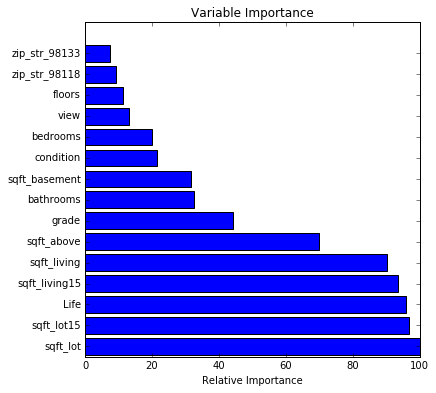

In [18]:
df_Xtest = pd.DataFrame(X_test)
df_Xtrain = pd.DataFrame(X_train)
isinstance(df_Xtrain, pd.DataFrame)

a = np.array(range(15))
a = -a-1
#a = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[a]
pos = np.arange(sorted_idx[a].shape[0]) + .5
plt.figure(figsize=(6, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_Xtrain[sorted_idx].columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('Feature_importance.png',dpi=100)
plt.show()